# Data, Function, and Library Consolidation

## Import Libraries used in notebook

In [1]:
import pandas as pd # For working with dataframes
import numpy as np # For working with numpy arrays
from sklearn import decomposition # For performing PCA on the data
from sklearn.model_selection import train_test_split #Data splitting
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier for training
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt # For plotting visualizations of analysis
import altair as alt # For additional plotting functionality
import seaborn as sns # Additional scientific programming
import warnings # Suppress warnings from output
from sklearn.multioutput import MultiOutputClassifier #For prediction into multiple categories
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix #Assessing the model
from sklearn.pipeline import Pipeline #Create a pipeline of all of the data processing steps
from tqdm import tqdm  # Import tqdm for progress tracking
import ptitprince as pt # For raincloud plot
from matplotlib_venn import venn3 # Venn Diagram

## Define Functions

In [21]:
def finetuning_1D(param, min_param, max_param, incre_param, param_2, param_2_value, X_train, y_train, X_val, y_val):
    # Define ranges for n_estimators
    param_range = range(min_param, max_param, incre_param)  # E.g., from 10 to 600 trees
    
    # Initialize lists to store errors
    train_errors = []
    val_errors = []
    
    # Fine-tune n_estimators
    for n in param_range:
        rfclass_test = RandomForestClassifier()
        # Dynamically set the parameter using setattr
        setattr(rfclass_test, param, n)  # Set the parameter (e.g. n_estimators, max_depth, etc.)
        setattr(rfclass_test, param_2, param_2_value)  # Set the parameter (e.g. n_estimators, max_depth, etc.)
        
        model_test = MultiOutputClassifier(rfclass_test)
        
        # Train the model
        model_test.fit(X_train, y_train)
        
        # Predict on training data
        train_preds = model_test.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_preds)
        train_errors.append(1 - train_accuracy)  # Store the training error (1 - accuracy)
        
        # Predict on validation data
        val_preds = model_test.predict(X_val)
        val_accuracy = accuracy_score(y_val, val_preds)
        val_errors.append(1 - val_accuracy)  # Store the validation error (1 - accuracy)
    
    # Plot training and validation errors
    plt.figure(figsize=(12, 6))
    plt.plot(param_range, train_errors, label='Training Error', marker='o')
    plt.plot(param_range, val_errors, label='Validation Error', marker='o')
    plt.title(f'Training and Validation Errors vs. {param}')
    plt.xlabel(f'Number of {param}')
    plt.ylabel('Error Rate')
    plt.legend()
    plt.grid()
    plt.xticks(param_range)  # Ensure every tick to be shown
    plt.show()


def finetuning_2D(param_1, min_param_1, max_param_1, incre_param_1, param_2, min_param_2, max_param_2, incre_param_2, X_train, y_train, X_val, y_val):
    param_1_range = range(min_param_1, max_param_1, incre_param_1)  # E.g., from 10 to 600 trees
    param_2_range = range(min_param_2, max_param_2, incre_param_2)  # E.g., from 1 to 20
    
    # Initialize 2D arrays to store errors
    train_errors = np.zeros((len(param_1_range), len(param_2_range)))
    val_errors = np.zeros((len(param_1_range), len(param_2_range)))
    
    # Iterate over n_estimators with progress tracking
    for i, n in tqdm(enumerate(param_1_range), total=len(param_1_range), desc="Processing n_estimators"):
        for j, md in tqdm(enumerate(param_2_range), total=len(param_2_range), desc="Processing max_depth", leave=False):
            rfclass_test_2D = RandomForestClassifier()
            # Dynamically set the parameter using setattr
            setattr(rfclass_test_2D, param_1, n)  # Set the parameter (e.g. n_estimators, max_depth, etc.)
            setattr(rfclass_test_2D, param_2, md)  # Set the parameter (e.g. n_estimators, max_depth, etc.)
            model_test_2D = MultiOutputClassifier(rfclass_test_2D)
            
            # Train the model
            model_test_2D.fit(X_train, y_train)
    
            # Predict on training data
            train_preds = model_test_2D.predict(X_train)
            train_accuracy = accuracy_score(y_train, train_preds)
            train_errors[i, j] = 1 - train_accuracy  # Store the training error (1 - accuracy)
    
            # Predict on validation data
            val_preds = model_test_2D.predict(X_val)
            val_accuracy = accuracy_score(y_val, val_preds)
            val_errors[i, j] = 1 - val_accuracy  # Store the validation error (1 - accuracy)
    # Plotting the heatmaps
    plt.figure(figsize=(14, 6))
    
    # Heatmap for Training Error
    plt.subplot(1, 2, 1)
    heatmap_train = sns.heatmap(train_errors, 
                                 xticklabels=param_2_range, 
                                 yticklabels=param_1_range, 
                                 cmap='YlGnBu', 
                                 annot=False)  # Store the heatmap for the training error
    plt.title('Training Error Heatmap')
    plt.xlabel(f'{param_2}')
    plt.ylabel(f'{param_1}')
    #plt.colorbar(heatmap_train.collections[0], label='Error Rate')  # Use the first collection for colorbar
    
    # Heatmap for Validation Error
    plt.subplot(1, 2, 2)
    heatmap_val = sns.heatmap(val_errors, 
                               xticklabels=param_2_range, 
                               yticklabels=param_1_range, 
                               cmap='YlGnBu', 
                               annot=False)  # Store the heatmap for the validation error
    plt.title('Validation Error Heatmap')
    plt.xlabel(f'{param_2}')
    plt.ylabel(f'{param_1}')
    #plt.colorbar(heatmap_val.collections[0], label='Error Rate')  # Use the first collection for colorbar
    
    plt.tight_layout()
    plt.show()

## Import and look at the snps data for the samples

In [3]:
df = pd.read_csv('matrix_10step.csv')
df

,Unnamed: 0,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533,Population code
0,HG00096,0,1,0,0,1,0,0,0,0,...,1,2,0,0,1,0,0,0,0,GBR
1,HG00097,1,1,1,0,0,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR
2,HG00099,1,0,1,0,0,1,0,1,0,...,0,2,0,0,0,0,0,0,0,GBR
3,HG00100,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,GBR
4,HG00101,1,0,0,0,1,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,0,0,1,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI


## Provide the appropriate label for the unnamed column --> Samples. The rest of the columns refer to the snps

In [4]:
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True) #The columns correspond to the specific snp that is present (1) or absent (0)
df.head()

,Sample,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533,Population code
0,HG00096,0,1,0,0,1,0,0,0,0,...,1,2,0,0,1,0,0,0,0,GBR
1,HG00097,1,1,1,0,0,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR
2,HG00099,1,0,1,0,0,1,0,1,0,...,0,2,0,0,0,0,0,0,0,GBR
3,HG00100,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,GBR
4,HG00101,1,0,0,0,1,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR


## Import population data

In [6]:
pop_df = pd.read_csv('igsr_populations.tsv', sep='\t')
print(f'Size of df: {pop_df.shape}')
pop_df.head()

Size of df: (212, 11)


,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,CHS,CHS,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.78000,106.680000,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NaN,BrahminSGDP,Brahmin,Brahmin in India (SGDP),17.70000,83.300000,NaN,South Asia (SGDP),#008c1e,18,Simons Genome Diversity Project
3,NaN,MiaoSGDP,Miao,Miao in China (SGDP),28.00000,109.000000,NaN,East Asia (SGDP),#ff48de,16,Simons Genome Diversity Project
4,NaN,KyrgyzSGDP,Kyrgyz,Kyrgyz in Kyrgyzystan (SGDP),42.90000,74.600000,NaN,Central Asia and Siberia (SGDP),#01daa0,15,Simons Genome Diversity Project


# Understanding and Separating Data Sets

### The prefix "rs" of a SNP (Single Nucleotide Polymorphism) identifier stands for "Reference SNP". The "rs" identifier is a unique number assigned to each SNP that has been cataloged in the dbSNP database, which is maintained by the National Center for Biotechnology Information (NCBI).

### Characteristics of rs Identifiers

**Cataloging Genetic Variants**: "rs" numbers serve as unique identifiers for SNPs and other variants in genomic databases, primarily dbSNP. Each "rs" number corresponds to a specific variant that has been studied and annotated.

**Common Usage in Publications**: Researchers often use "rs" identifiers in scientific literature to reference specific SNPs without ambiguity. This standardized nomenclature facilitates communication about genetic variants across studies.

**Linking to Genomic Data**: rs identifiers are used in genome-wide association studies (GWAS), pharmacogenomics, and other genetic studies to associate specific SNPs with phenotypes, traits, diseases, or drug responses.

## Which columns don't correspond to a known snp that starts with 'rs':

In [7]:
non_rs_columns = [col for col in df.columns if not col.startswith('rs')]
non_rs_columns.remove('Sample')
# Print the non-matching column names
print("Columns that do not follow the format 'rs%':")
print(non_rs_columns)

Columns that do not follow the format 'rs%':
['Unnamed: 300', 'Unnamed: 317', 'esv2673573', 'esv2677375', 'esv2669345', 'esv2673622', 'Unnamed: 1941', 'Unnamed: 2575', 'Unnamed: 3467', 'Unnamed: 5004', 'Unnamed: 5682', 'esv2667826', 'Unnamed: 6100', 'Unnamed: 6747', 'esv2658046', 'esv2674072', 'Unnamed: 7765', 'Unnamed: 7962', 'esv2658091', 'esv2677625', 'Unnamed: 8800', 'Unnamed: 9097', 'Unnamed: 9402', 'Unnamed: 10166', 'Unnamed: 10260', 'Unnamed: 10341', 'esv2678940', 'Unnamed: 10587', 'Unnamed: 11079', 'esv2662756', 'Unnamed: 12124', 'Unnamed: 12891', 'Unnamed: 13545', 'Unnamed: 13971', 'esv2666282', 'esv2662174', 'Unnamed: 15501', 'Unnamed: 15774', 'Unnamed: 16222', 'Unnamed: 17479', 'Unnamed: 17947', 'Unnamed: 18412', 'Unnamed: 18614', 'Unnamed: 18753', 'Unnamed: 19049', 'Unnamed: 19184', 'Unnamed: 20122', 'Unnamed: 20199', 'Unnamed: 20994', 'Unnamed: 21352', 'esv2666744', 'esv2678147', 'Unnamed: 23102', 'esv2663096', 'esv2663104', 'esv2672093', 'Unnamed: 27884', 'Unnamed: 28109'

## There's Unnamed snps and those that begin with 'esv'
### SNPs that start with 'esv' are known as esequence variants or Variant IDs. The 'esv' prefix typically indicates that these are "variant" identifiers originating from databases like the dbSNP or the 1000 Genomes Project.

### Characteristics of ESVs:

**Variant Type**: ESVs can represent a variety of genomic variants, including SNPs (single nucleotide polymorphisms), insertions, deletions, and larger structural variants.

**Identification**: The 'esv' prefix is commonly used specifically for structural and functional variants, differentiating them from traditional SNP IDs which typically start with 'rs'.

**Database Reference**: These identifiers are usually referenced in population genetics databases and are used in genomic studies for linking phenotype data to genetic information. They help provide unique identification for variants that have been characterized in various studies.

# Data Processing Steps

## Data Splitting: Separate data into training, validation, and test sets

In [5]:
train_set, testing_set = train_test_split(df, test_size = 0.3, stratify = df['Population code'], random_state=42) #Specify split state
validation_test, test_set = train_test_split(testing_set, test_size = 0.5, stratify = testing_set['Population code'])
print(train_set.shape)
train_set.head()

(764, 49434)


,Sample,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533,Population code
427,NA11843,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,CEU
633,NA18939,1,1,1,0,0,0,0,1,0,...,1,2,0,0,1,0,0,0,0,JPT
863,NA19471,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,LWK
540,NA18557,0,0,0,0,2,0,0,0,0,...,0,2,0,0,1,0,0,0,0,CHB
996,NA20504,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,TSI


## ----------------Put Aside Test Set, Begin Working with Training & Validation Set ------------------

## Add the demographical data

In [8]:
train_set = train_set.merge(pop_df, on='Population code', how='inner') # Merge the demographical data  to the df with principal component values
print(f'Size of df: {train_set.shape}')
train_set.head()

Size of df: (764, 49444)


,Sample,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,NA11843,0,0,0,0,0,0,0,0,0,...,CEU,CEPH,Utah residents (CEPH) with Northern and Wester...,40.767000,-111.890400,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,NA18939,1,1,1,0,0,0,0,1,0,...,JPT,Japanese,"Japanese in Tokyo, Japan",35.680000,139.680000,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NA19471,0,0,0,0,0,0,0,0,0,...,LWK,Luhya,"Luhya in Webuye, Kenya",-1.270000,36.610000,AFR,African Ancestry,#ffd845,1,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,NA18557,0,0,0,0,2,0,0,0,0,...,CHB,Han Chinese,"Han Chinese in Beijing, China",39.916666,116.383333,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,NA20504,0,0,0,0,1,0,0,0,0,...,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


## Separate the categorical and numerical data

In [9]:
# Select all numerical columns
snps_df = train_set.select_dtypes(include=['number'])
meta_df = train_set.select_dtypes(exclude=['number'])
print(snps_df.shape)
meta_df.head()

(764, 49435)


,Sample,Population code,Population elastic ID,Population name,Population description,Superpopulation code,Superpopulation name,Superpopulation display colour,Data collections
0,NA11843,CEU,CEU,CEPH,Utah residents (CEPH) with Northern and Wester...,EUR,European Ancestry,#018ead,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,NA18939,JPT,JPT,Japanese,"Japanese in Tokyo, Japan",EAS,East Asian Ancestry,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NA19471,LWK,LWK,Luhya,"Luhya in Webuye, Kenya",AFR,African Ancestry,#ffd845,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,NA18557,CHB,CHB,Han Chinese,"Han Chinese in Beijing, China",EAS,East Asian Ancestry,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,NA20504,TSI,TSI,Toscani,Toscani in Italy,EUR,European Ancestry,#018ead,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


## Create Dummies for the Superpopulation categories using One-Hot Encoding

In [10]:
meta_df = pd.get_dummies(meta_df, columns=['Superpopulation name'])

In [11]:
meta_df.head()

,Sample,Population code,Population elastic ID,Population name,Population description,Superpopulation code,Superpopulation display colour,Data collections,Superpopulation name_African Ancestry,Superpopulation name_American Ancestry,Superpopulation name_East Asian Ancestry,Superpopulation name_European Ancestry
0,NA11843,CEU,CEU,CEPH,Utah residents (CEPH) with Northern and Wester...,EUR,#018ead,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,False,True
1,NA18939,JPT,JPT,Japanese,"Japanese in Tokyo, Japan",EAS,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,True,False
2,NA19471,LWK,LWK,Luhya,"Luhya in Webuye, Kenya",AFR,#ffd845,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",True,False,False,False
3,NA18557,CHB,CHB,Han Chinese,"Han Chinese in Beijing, China",EAS,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,True,False
4,NA20504,TSI,TSI,Toscani,Toscani in Italy,EUR,#018ead,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,False,True


## Define X_train and y_train

In [12]:
X_train = snps_df.drop(['Population latitude','Population longitude','Superpopulation display order'], axis = 1)
X_train

,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,rs144366698,...,rs6010087,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,1,0,0,...,0,1,2,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0,0,0,0,0,0,0,0,0,0,...,0,1,2,0,0,0,0,0,0,1
760,0,0,0,0,1,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
761,0,0,0,0,2,0,0,0,0,0,...,0,0,2,0,0,1,0,0,1,0
762,0,0,0,0,1,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0


In [13]:
y_train = meta_df[['Superpopulation name_African Ancestry', 'Superpopulation name_American Ancestry', 'Superpopulation name_East Asian Ancestry', 'Superpopulation name_European Ancestry']]
y_train

,Superpopulation name_African Ancestry,Superpopulation name_American Ancestry,Superpopulation name_East Asian Ancestry,Superpopulation name_European Ancestry
0,False,False,False,True
1,False,False,True,False
2,True,False,False,False
3,False,False,True,False
4,False,False,False,True
...,...,...,...,...
759,True,False,False,False
760,False,True,False,False
761,False,False,True,False
762,False,True,False,False


## Validation Set

In [14]:
validation_set = validation_test.merge(pop_df, on='Population code', how='inner') 

X_val = validation_set.select_dtypes(include=['number']).drop(columns=['Population latitude','Population longitude','Superpopulation display order'])
y_val = pd.get_dummies(validation_set['Superpopulation name'])

# Create models for training and fit it to the data

## Fine-tuning the parameters for the model
1. n_estimators

Definition: The n_estimators parameter specifies the number of trees in the forest. Each tree is trained independently on a random subset of the data and a random subset of features.

2. max_depth

Definition: The max_depth parameter determines the maximum depth of each tree in the forest. This depth refers to the number of splits or levels in a tree.

## Validation and Training error for different n_estimator values

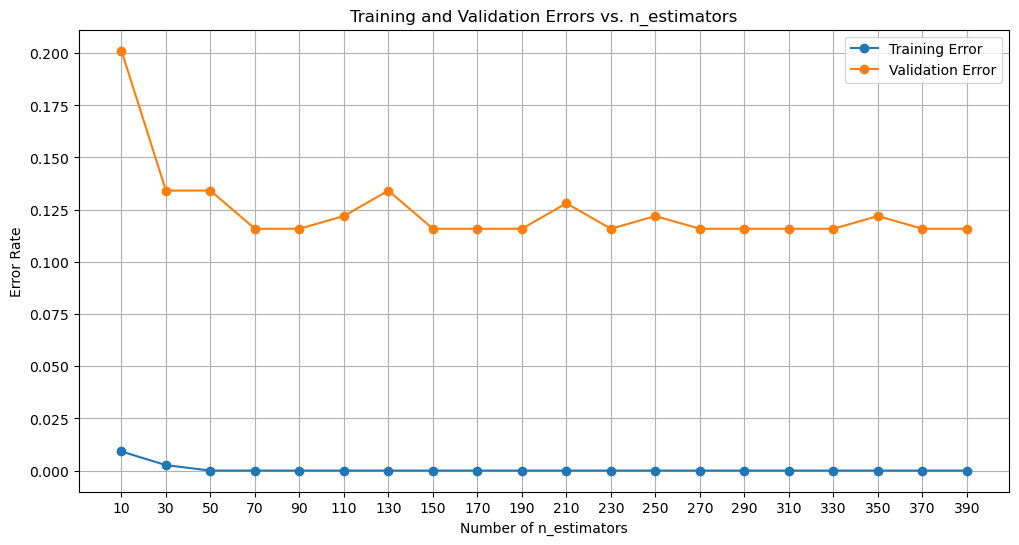

In [22]:
finetuning_1D('n_estimators', 10, 400, 20, 'max_depth', 12, X_train, y_train, X_val, y_val)

## I'm optimizing n-estimators and max-depth. Let's optimize these together, to account for any co-dependencies

## Training and Validation Error vs. n_estimator and max_depth

Processing n_estimators: 100%|████████████████████| 8/8 [05:02<00:00, 37.86s/it]


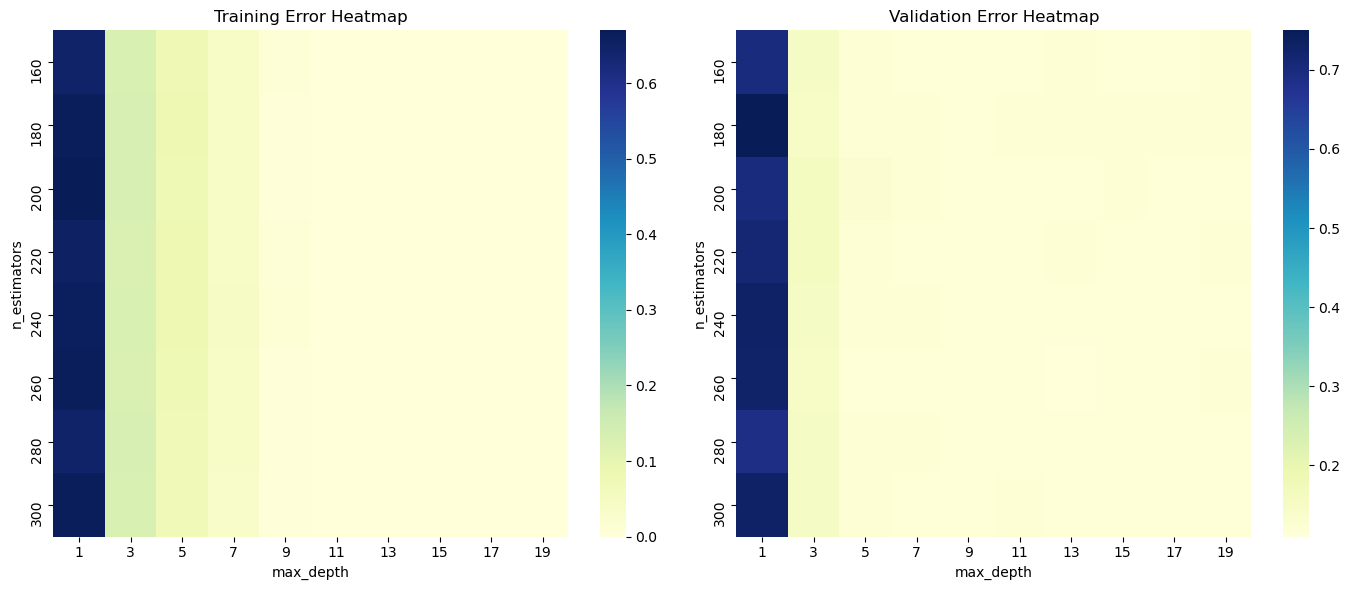

In [17]:
finetuning_2D('n_estimators', 160, 301, 20, 'max_depth', 1, 20, 2, X_train, y_train, X_val, y_val)

## The best max_depth value looks like 5, where the validation error stops improving. Let's visualize this better for n_estimator = 170 on a linear plot:

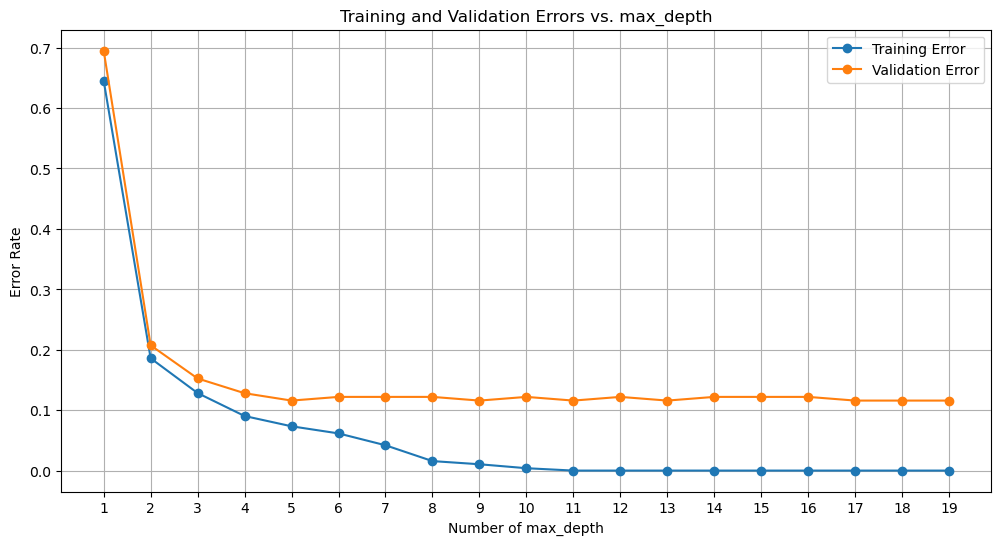

In [27]:
finetuning_1D('max_depth', 1, 20, 1, 'n_estimators', 170, X_train, y_train, X_val, y_val)

## The improvement in the validation error declines after the max depth reaches 5. Beyond this value, the training error is probably reducing due to overfitting to the training set. We've narrowed the range of the parameters. Let's now incorporate cros validation to minimize overfitting to the specific training-test split.
## Grid Search with Cross Validation

In [25]:
param_grid = {
    'n_estimators': range(150, 200, 10),  # Example values, can be adjusted
    'max_depth': range(1, 10, 1)  # None means nodes are expanded until all leaves are pure
}

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Use accuracy for evaluation
                           n_jobs=-1,  # Use all available cores
                           verbose= True)  # Print progress

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'max_depth': 9, 'n_estimators': 180}


## Creating the RFC with the best n_estimator and max_depth values

In [28]:
rfclass = RandomForestClassifier(n_estimators=180, max_depth = 9) # n_estimators=100,max_features='sqrt',max_depth=None,min_samples_split=2,min_samples_leaf=1,bootstrap=True,random_state=42,class_weight='balanced'
rfclass

RandomForestClassifier(max_depth=9, n_estimators=180)

## Wrap it in MultiOutputClassifier for multi-label classification and __TRAIN__ the Model

In [29]:
model = MultiOutputClassifier(rfclass)

# Train the model
model.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=9,
                                                       n_estimators=180))

# Model Assessment

## ASSESS: Confusion Matrix and Accuracy on the ***Training*** Set

In [30]:
y_pred_train = model.predict(X_train)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

# Calculate accuracy if needed
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Overall Accuracy: {accuracy_train:.4f}")

# Print the confusion matrix for each target variable
print("\nConfusion Matrix (Training Set):")
for i, col in enumerate(y_train.columns):
    cm = confusion_matrix(y_train.iloc[:, i], y_pred_train[:, i])
    print(f"Confusion Matrix for {col}:\n{cm}\n")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       173
           1       1.00      0.96      0.98       126
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       265

   micro avg       1.00      0.99      1.00       764
   macro avg       1.00      0.99      0.99       764
weighted avg       1.00      0.99      1.00       764
 samples avg       0.99      0.99      0.99       764

Overall Accuracy: 0.9921

Confusion Matrix (Training Set):
Confusion Matrix for Superpopulation name_African Ancestry:
[[591   0]
 [  1 172]]

Confusion Matrix for Superpopulation name_American Ancestry:
[[638   0]
 [  5 121]]

Confusion Matrix for Superpopulation name_East Asian Ancestry:
[[564   0]
 [  0 200]]

Confusion Matrix for Superpopulation name_European Ancestry:
[[499   0]
 [  0 265]]



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Make Predictions on the ***Validation*** Data

In [32]:
y_pred = model.predict(X_val)

In [33]:
print(y_val.shape)
print(y_pred.shape)

(164, 4)
(164, 4)


## ASSESS: Confusion Matrix and Accuracy on the Validation Set
### - Lower accuracy on the validation set --> Overfitting

In [49]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Calculate accuracy if needed
accuracy = accuracy_score(y_val, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

# Print the confusion matrix for each target variable
print("\nConfusion Matrix (Training Set):")
for i, col in enumerate(y_val.columns):
    cm = confusion_matrix(y_val.iloc[:, i], y_pred[:, i])
    print(f"Confusion Matrix for {col}:\n{cm}\n")


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.89      0.30      0.44        27
           2       1.00      1.00      1.00        44
           3       0.86      1.00      0.93        57

   micro avg       0.92      0.88      0.90       164
   macro avg       0.92      0.82      0.83       164
weighted avg       0.92      0.88      0.87       164
 samples avg       0.88      0.88      0.88       164

Overall Accuracy: 0.8780

Confusion Matrix (Training Set):
Confusion Matrix for African Ancestry:
[[126   2]
 [  1  35]]

Confusion Matrix for American Ancestry:
[[136   1]
 [ 19   8]]

Confusion Matrix for East Asian Ancestry:
[[120   0]
 [  0  44]]

Confusion Matrix for European Ancestry:
[[98  9]
 [ 0 57]]



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### There's high variance (train accuracy > val accuracy) which indicates **overfitting**. 
### There seems to be overfitting to the data to separate the overlaps of American and European ancestory as seen in previous PCA analysis
## Below I **REMOVE** American samples and ASSESS the validation predictions using the same model (no retraining or recalculations) --> 99+% accuracy!

In [39]:
y_pred_df = pd.DataFrame(y_pred, columns = ['African Ancestry', 'American Ancestry', 'East Asian Ancestry','European Ancestry'])

In [40]:
y_val_no_murica = y_val[y_val['American Ancestry']==False]

# Get the indices of y_val where 'American Ancestry' is True
indices_to_remove = y_val.index[y_val['American Ancestry']].tolist()

# Remove the same indices from y_pred_df
y_pred_no_murica = y_pred_df.drop(index=indices_to_remove)

In [41]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val_no_murica, y_pred_no_murica))

# Calculate accuracy if needed
accuracy = accuracy_score(y_val_no_murica, y_pred_no_murica)
print(f"Overall Accuracy: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        57

   micro avg       0.99      0.99      0.99       137
   macro avg       0.75      0.74      0.75       137
weighted avg       1.00      0.99      1.00       137
 samples avg       0.99      0.99      0.99       137

Overall Accuracy: 0.9927


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# CREATE and TRAIN Another Model Without American Samples

## Remove American Samples

In [42]:
train_set_no_murica = train_set[train_set['Superpopulation name']!='American Ancestry']
validation_set_no_murica = validation_set[validation_set['Superpopulation name']!='American Ancestry']

X_val_nm = validation_set_no_murica.select_dtypes(include=['number']).drop(columns=['Population latitude','Population longitude','Superpopulation display order'])
y_val_nm = pd.get_dummies(validation_set_no_murica['Superpopulation name'])

In [43]:
snps_nm_df = train_set_no_murica.select_dtypes(include=['number'])
meta_nm_df = train_set_no_murica.select_dtypes(exclude=['number'])
meta_nm_df = pd.get_dummies(meta_nm_df, columns=['Superpopulation name'])

In [44]:
X_train_no_murica = snps_nm_df.drop(['Population latitude','Population longitude','Superpopulation display order'], axis = 1)
y_train_no_murica = meta_nm_df[['Superpopulation name_African Ancestry', 'Superpopulation name_East Asian Ancestry', 'Superpopulation name_European Ancestry']]

## Fine-tuning: Validation and Training error for different n_estimator values

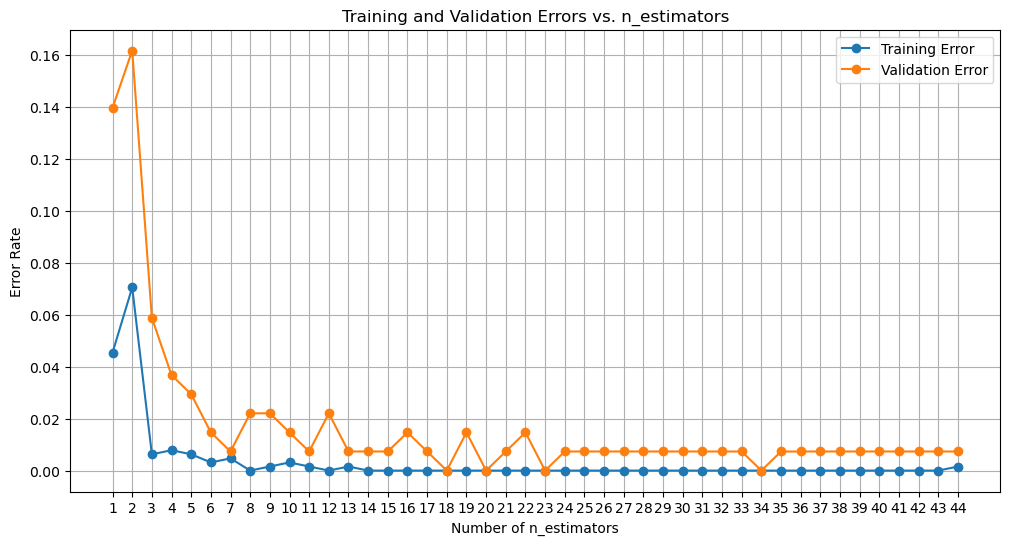

In [27]:
finetuning_1D('n_estimators', 1, 45, 1, X_train_no_murica, y_train_no_murica, X_val_nm, y_val_nm)

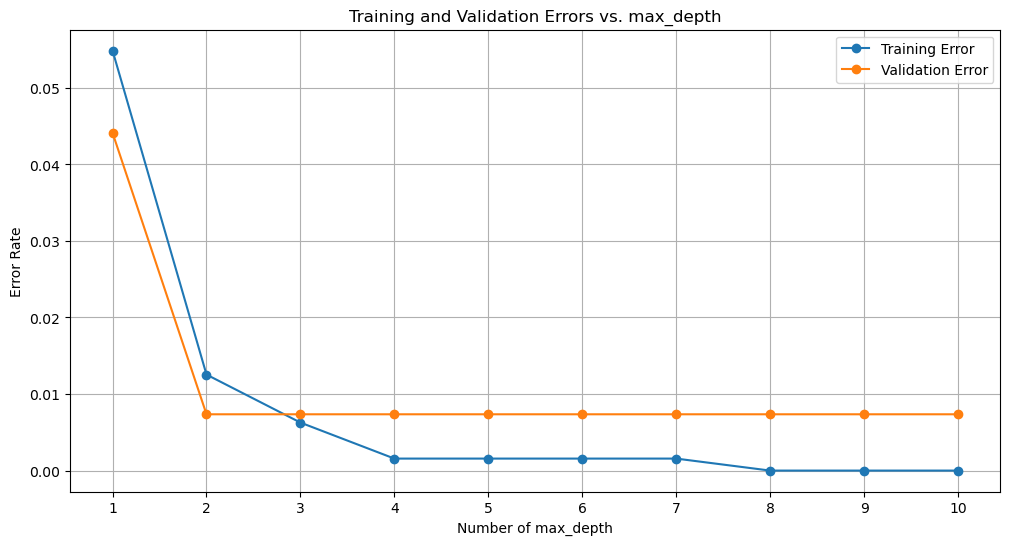

In [28]:
finetuning_1D('max_depth', 1, 11, 1, X_train_no_murica, y_train_no_murica, X_val_nm, y_val_nm)

Processing n_estimators: 100%|████████████████████| 9/9 [00:38<00:00,  4.32s/it]


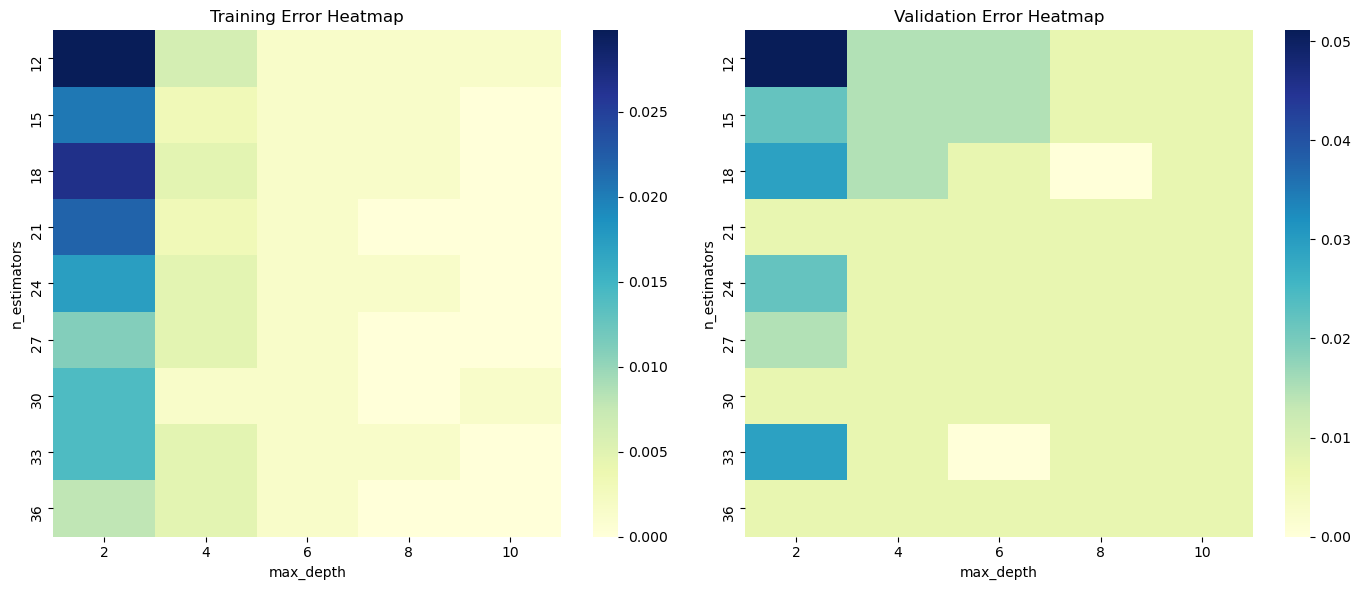

In [357]:
finetuning_2D('n_estimators', 12, 37, 3,'max_depth', 2, 12, 2, X_train_no_murica, y_train_no_murica, X_val_nm, y_val_nm)

## Grid Search with Cross Validation

In [358]:
param_grid = {
    'n_estimators': range(1, 200, 1),  # Example values, can be adjusted
    'max_depth': range(1, 20, 1)  # None means nodes are expanded until all leaves are pure
}

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Use accuracy for evaluation
                           n_jobs=-1,  # Use all available cores
                           verbose=1)  # Print progress

# Fit the model
grid_search.fit(X_train_no_murica, y_train_no_murica)

# Retrieve the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

Fitting 5 folds for each of 3781 candidates, totalling 18905 fits
Best Parameters: {'max_depth': 12, 'n_estimators': 11}


## Train with selected n_estimators = 11 and max_depth = 12

In [45]:
rfclass_2 = RandomForestClassifier(n_estimators = 11, max_depth = 12) # n_estimators=100,max_features='sqrt',max_depth=None,min_samples_split=2,min_samples_leaf=1,bootstrap=True,random_state=42,class_weight='balanced'
model_2 = MultiOutputClassifier(rfclass_2)

# Train the model
model_2.fit(X_train_no_murica, y_train_no_murica)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=12,
                                                       n_estimators=11))

In [46]:
# Make predictions on X_val
y_pred_train_no_murica = model_2.predict(X_train_no_murica)

## Perfect Accuracy on the Training Data!

In [50]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_train_no_murica, y_pred_train_no_murica))

# Calculate accuracy if needed
accuracy_train = accuracy_score(y_train_no_murica, y_pred_train_no_murica)
print(f"Overall Accuracy: {accuracy_train:.4f}")

# Print the confusion matrix for each target variable
print("\nConfusion Matrix (Training Set):")
for i, col in enumerate(y_train_no_murica.columns):
    cm = confusion_matrix(y_train_no_murica.iloc[:, i], y_pred_train_no_murica[:, i])
    print(f"Confusion Matrix for {col}:\n{cm}\n")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       265

   micro avg       1.00      1.00      1.00       638
   macro avg       1.00      1.00      1.00       638
weighted avg       1.00      1.00      1.00       638
 samples avg       1.00      1.00      1.00       638

Overall Accuracy: 1.0000

Confusion Matrix (Training Set):
Confusion Matrix for Superpopulation name_African Ancestry:
[[465   0]
 [  0 173]]

Confusion Matrix for Superpopulation name_East Asian Ancestry:
[[438   0]
 [  0 200]]

Confusion Matrix for Superpopulation name_European Ancestry:
[[373   0]
 [  0 265]]



## ASSESS Against the Validation Set --> ~99+% accuracy! It's likely that the issue was overfitting to the train-set differences between the American and European superpopulations!

In [52]:
# Make predictions on X_val
y_pred_nm = model_2.predict(X_val_nm)

In [53]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val_nm, y_pred_nm))

# Calculate accuracy if needed
accuracy_nm = accuracy_score(y_val_nm, y_pred_nm)
print(f"Overall Accuracy: {accuracy_nm:.4f}")

# Print the confusion matrix for each target variable
print("\nConfusion Matrix (Training Set):")
for i, col in enumerate(y_val_nm.columns):
    cm = confusion_matrix(y_val_nm.iloc[:, i], y_pred_nm[:, i])
    print(f"Confusion Matrix for {col}:\n{cm}\n")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       1.00      1.00      1.00        44
           2       0.98      1.00      0.99        57

   micro avg       0.99      0.99      0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137
 samples avg       0.99      0.99      0.99       137

Overall Accuracy: 0.9927

Confusion Matrix (Training Set):
Confusion Matrix for African Ancestry:
[[101   0]
 [  1  35]]

Confusion Matrix for East Asian Ancestry:
[[93  0]
 [ 0 44]]

Confusion Matrix for European Ancestry:
[[79  1]
 [ 0 57]]



# Discussion:
### Looking into how companies like 23&me predict genetic ancestory, they have reference genotype profiles for ancestry populations that samples are sorted into. It makes sense that these would be distinct populations with a degree of genetic separation because they're from different genetic pools. Here, 'American' ancestory is still largely coinciding with European ancestory instead of a native gene pool.

### More details on 23&me's process:
- The extracted DNA goes through a genotyping process, where specific regions of the genome are analyzed.
- Instead of sequencing the entire genome, 23andMe focuses on known single nucleotide polymorphisms (SNPs). These are variations at specific positions in the DNA sequence that can be associated with certain traits or ancestry information.
- The high-throughput genotyping technologies, like microarrays, allow for the simultaneous analysis of hundreds of thousands to millions of SNPs in a single test.
### Data Processing and Analysis
- Ancestry Composition: The SNP data is compared against reference populations to determine ancestry. Algorithms use large databases of genetic information from diverse populations to estimate geographic ancestry proportions (e.g., European, African, Asian).
- Phasing and Imputation: This involves determining which SNPs are inherited together and can fill in missing genetic information based on known haplotypes from reference genomes.
- Health Features: 23andMe also analyzes the SNPs associated with specific traits, such as susceptibility to certain conditions, carrier status for genetic disorders, and direct-to-consumer health traits. Predictive algorithms might assess risk based on genetic predispositions.

# IDEA: Which snps are strong indicators of genotype? Identify. Do they coincide with biggest contributors to the principal components?

In [32]:
# Dictionary to store importance DataFrames
importance_dataframes = {}

# Step to retrieve feature importance for each target with progress tracking
for i, (col_name, estimator) in tqdm(enumerate(zip(y_train_no_murica.columns, model_2.estimators_)), total=len(y_train_no_murica.columns), desc='Processing Columns'):
    importances = estimator.feature_importances_
    
    # Create a DataFrame for feature importance
    importance_df = pd.DataFrame({
        'Feature': X_train_no_murica.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Store the DataFrame in the dictionary with the column name
    importance_dataframes[col_name] = importance_df

    # Print feature importances for the current output variable
    print(f"\nFeature Importances for {col_name}:")
    print(importance_df)

Processing Columns: 100%|████████████████████████| 3/3 [00:00<00:00, 105.03it/s]


Feature Importances for Superpopulation name_African Ancestry:
           Feature  Importance
25124    rs4821316    0.056399
563      rs5994047    0.054215
25533     rs134323    0.053157
41358    rs9627422    0.051879
25532    rs7410699    0.049471
...            ...         ...
16511    rs5752777    0.000000
16512  rs185085977    0.000000
16513  rs116753442    0.000000
16514  rs142052243    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]

Feature Importances for Superpopulation name_East Asian Ancestry:
           Feature  Importance
31424    rs5757619    0.047048
27407    rs2277843    0.039907
33023   rs66461121    0.038369
36847    rs7290135    0.036868
36232   rs72619546    0.035769
...            ...         ...
16517   rs12165475    0.000000
16518  rs181307338    0.000000
16519    rs2347443    0.000000
16520  rs144507404    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]

Feature Importances for Superpopulation name_European Ancestry:
        

In [33]:
print(importance_dataframes.keys())

dict_keys(['Superpopulation name_African Ancestry', 'Superpopulation name_East Asian Ancestry', 'Superpopulation name_European Ancestry'])


## Let's visualize to see if the distinguishing snps are different for the different populations!

In [34]:
# Convert to DataFrames
df_african = importance_dataframes['Superpopulation name_African Ancestry']
df_african['Category'] = 'African Ancestry'

df_eastern = importance_dataframes['Superpopulation name_East Asian Ancestry']
df_eastern['Category'] = 'East Asian Ancestry'

df_european = importance_dataframes['Superpopulation name_European Ancestry']
df_european['Category'] = 'European Ancestry'

# Combine all DataFrames
combined_importances = pd.concat([df_african, df_eastern, df_european])

# Set the order of categories for plotting
combined_importances['Category'] = pd.Categorical(combined_importances['Category'], 
                                                  categories=['African Ancestry', 'East Asian Ancestry', 'European Ancestry'],
                                                  ordered=True)

In [35]:
df_african.keys()

Index(['Feature', 'Importance', 'Category'], dtype='object')

## Venn Diagram of overlap of the important alleles between groups
### The lack of overlap is expected because these are the alleles that best help distinguish these populations. Whether or not I've found something significant needs to be validated with biological knowledge.
### - Are these snps known to be markers of ancestory? **No**
### - Have I identified any new potential markers? **Possibly**
### - Has this analysis missed any important markers that make the results suspicious? **The rs60910145 snp wasn't picked as predictive of African ancestry**

In [37]:
african_imp_alleles =  df_african[df_african['Importance']>0.01]
eastern_imp_alleles =  df_eastern[df_eastern['Importance']>0.01]
european_imp_alleles =  df_european[df_european['Importance']>0.01]
print(african_imp_alleles.shape)
print(eastern_imp_alleles.shape)
print(european_imp_alleles.shape)

(23, 3)
(24, 3)
(25, 3)


### Importance > 0.01

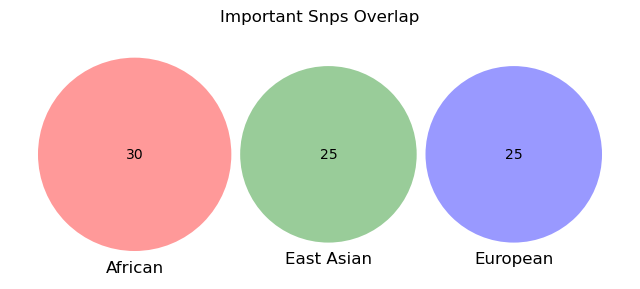

In [371]:
# Create a Venn diagram for the sets
plt.figure(figsize=(8, 8))
#venn3([set_coverage,set_coverage_fail, set_CNV_calling, set_CNV_calling_fail, set_passed_well, set_passed_well_fail], ('Coverage','Coverage Fail', 'CNV Calling','CNV Calling Fail', 'Passed Well', 'Passed Well Fail'))
#venn3([set_coverage, set_coverage_fail], ('Coverage','Coverage Fail'))
venn3([set(african_imp_alleles.index),set(eastern_imp_alleles.index),set(european_imp_alleles.index)], ('African','East Asian', 'European'))
# Set title and show the plot
plt.title('Important Snps Overlap')
plt.show()

In [108]:
print(f'Important alleles for African ancestry prediction: {african_imp_alleles.head()}')
print(f'Important alleles for East Asian ancestry prediction: {eastern_imp_alleles.head()}')
print(f'Important alleles for European ancestry prediction: {european_imp_alleles.head()}')

Important alleles for African ancestry prediction:          Feature  Importance          Category
25124  rs4821316    0.056399  African Ancestry
563    rs5994047    0.054215  African Ancestry
25533   rs134323    0.053157  African Ancestry
41358  rs9627422    0.051879  African Ancestry
25532  rs7410699    0.049471  African Ancestry
Important alleles for East Asian ancestry prediction:           Feature  Importance             Category
31424   rs5757619    0.047048  East Asian Ancestry
27407   rs2277843    0.039907  East Asian Ancestry
33023  rs66461121    0.038369  East Asian Ancestry
36847   rs7290135    0.036868  East Asian Ancestry
36232  rs72619546    0.035769  East Asian Ancestry
Important alleles for European ancestry prediction:           Feature  Importance           Category
36446  rs11704383    0.042930  European Ancestry
21633   rs7291198    0.037697  European Ancestry
8777    rs6003649    0.032987  European Ancestry
35912    rs738388    0.032334  European Ancestry
47535    r

In [116]:
imp_af_filter = african_imp_alleles['Feature'].tolist()
imp_af_filter += ['Superpopulation name_African Ancestry','Superpopulation name_European Ancestry','Superpopulation name_East Asian Ancestry','Superpopulation name_American Ancestry']
imp_eur_filter = european_imp_alleles['Feature'].tolist()
imp_eur_filter += ['Superpopulation name_African Ancestry','Superpopulation name_European Ancestry','Superpopulation name_East Asian Ancestry','Superpopulation name_American Ancestry']
imp_ea_filter = eastern_imp_alleles['Feature'].tolist()
imp_ea_filter += ['Superpopulation name_African Ancestry','Superpopulation name_European Ancestry','Superpopulation name_East Asian Ancestry','Superpopulation name_American Ancestry']

# OR AM I INTERPRETTING THIS WRONG. I haven't looked at presence / absence or frequencies of snps in populations --> Look at occurences and correlations below
## Correlations:

In [117]:
corr_df = pd.concat([X_train,y_train], axis = 1)
corr_af_df = corr_df[imp_af_filter]

In [118]:
target_column = 'Superpopulation name_African Ancestry'  # Replace this with your actual target column name.

# Step 2: Calculate the correlation matrix
correlation_matrix = corr_af_df.corr()

# Step 3: Extract correlations with the target column
target_correlations = correlation_matrix[target_column]#.sort_values(ascending=False)

# Display the most positively correlated columns
print("Columns most positively correlated with", target_column)
target_correlations

Columns most positively correlated with Superpopulation name_African Ancestry


rs4821316                                  -0.622180
rs5994047                                   0.693496
rs134323                                   -0.735936
rs9627422                                   0.671009
rs7410699                                  -0.755731
rs2065061                                   0.693577
rs9306513                                   0.628317
rs1569489                                   0.522836
rs6003660                                   0.611506
rs2319464                                  -0.688887
rs7284106                                   0.626344
rs111533107                                 0.563825
rs201655065                                 0.411666
rs9619446                                   0.623054
rs12170682                                  0.580606
rs5750248                                  -0.754120
rs115067161                                 0.681049
rs78901008                                  0.409744
rs144895795                                 0.

In [ ]:
target_column = 'Superpopulation name_African Ancestry'  # Replace this with your actual target column name.

# Step 2: Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# Step 3: Extract correlations with the target column
target_correlations = correlation_matrix[target_column]#.sort_values(ascending=False)

# Display the most positively correlated columns
print("Columns most positively correlated with", target_column)
target_correlations

## Occurences:

In [119]:
occur_df =  pd.concat([X_train,meta_df], axis = 1)
occurances_df = occur_df.groupby('Superpopulation code').sum().reset_index()
occurances_df.select_dtypes(include=['number'])

,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,rs144366698,...,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533,Superpopulation name_African Ancestry,Superpopulation name_American Ancestry,Superpopulation name_East Asian Ancestry,Superpopulation name_European Ancestry
0,23,36,24,0,74,22,22,22,6,9,...,30,47,0,2,0,12,173,0,0,0
1,12,38,11,5,87,10,12,12,0,1,...,2,36,0,2,0,5,0,126,0,0
2,19,56,17,24,176,16,13,23,0,0,...,0,77,5,0,9,0,0,0,200,0
3,28,44,26,1,133,28,25,26,0,0,...,0,80,0,0,0,1,0,0,0,265


## Percentage of occurence across superpopulations

In [120]:
imp_af_occurances_df = occurances_df[imp_af_filter] #/ occurances_df['Superpopulation name_African Ancestry'].iloc[0] #.sort_values(ascending=False) 
imp_eur_occurances_df = occurances_df[imp_eur_filter] #/ occurances_df['Superpopulation name_European Ancestry'].iloc[3]
imp_ea_occurances_df = occurances_df[imp_ea_filter] #/ occurances_df['Superpopulation name_East Asian Ancestry'].iloc[2]

imp_af_occurances_df = imp_af_occurances_df/imp_af_occurances_df.sum(axis = 0)
imp_eur_occurances_df = imp_eur_occurances_df/imp_eur_occurances_df.sum(axis = 0)
imp_ea_occurances_df = imp_ea_occurances_df/imp_ea_occurances_df.sum(axis = 0)

In [125]:
imp_af_occurances_df.iloc[0] #, imp_eur_occurances_df, imp_ea_occurances_df

rs4821316                                   0.031847
rs5994047                                   0.867470
rs134323                                    0.111635
rs9627422                                   0.845714
rs7410699                                   0.103803
rs2065061                                   0.978417
rs9306513                                   0.914729
rs1569489                                   0.382353
rs6003660                                   0.724891
rs2319464                                   0.050916
rs7284106                                   0.602817
rs111533107                                 0.952381
rs201655065                                 0.314869
rs9619446                                   0.956522
rs12170682                                  0.830882
rs5750248                                   0.118789
rs115067161                                 0.686992
rs78901008                                  0.907407
rs144895795                                 0.

# According to ChatGPT Notable SNPs Predictive of European Ancestry:

SLC24A5 (rs1426654):

This SNP is commonly associated with skin pigmentation in European populations. The "A" allele is particularly prevalent in Europeans and is linked to lighter skin tones.

HERC2 (rs12913832):

This SNP is associated with eye color, particularly blue eye color, which has a higher frequency in European populations. The "A" allele is commonly found in individuals of European descent.

TYR (rs1126809):

Associated with pigmentation traits, this SNP has been linked to lighter hair and skin color in Europeans. Variants in the TYR gene contribute to pigmentation in the skin, eyes, and hair.

OCA2 (rs1800407):

This SNP is also associated with skin pigmentation and eye color. It has been found to be more common in European populations compared to others.

ABCC11 (rs17822931):

This SNP is known for its association with the type of earwax (wet vs. dry) and is also found to be more common in European populations.

FTO (rs9939609):

Primarily studied for its association with obesity, this SNP has shown population differentiation and is frequently researched in the context of European ancestry.

RGS4 (rs1611115):

Studied for its association with traits in populations of European ancestry, particularly in studies related to psychiatric disorders.
ALDH2 (rs671):

Although primarily considered a marker in East Asian populations for alcohol metabolism, this SNP has also shown associations when analyzing European ancestries in specific contexts.

## Are any of these snps in this data set? Are they of high importance for prediction of any class?

In [373]:
european_predictive_snps = [
    'rs1426654',  # SLC24A5
    'rs12913832',  # HERC2
    'rs1126809',  # TYR
    'rs1800407',  # OCA2
    'rs9939609',  # FTO
    'rs1611115',  # RGS4
    'rs671',      # ALDH2
    'rs123456'    # Example not included
]
african_predictive_snps = [
    "rs73885319",  # APOL1 gene variant associated with kidney disease
    "rs60910145",  # Another APOL1 gene variant
    "rs1050828",    # G6PD gene variant associated with glucose-6-phosphate dehydrogenase deficiency
    "rs670",        # TBC1D4 gene variant associated with insulin signaling
    "rs1126809",    # TYR gene variant associated with pigmentation
    "rs16891982",   # SLC24A5 gene variant related to pigmentation (while more common in Europeans, it has significance in ancestry studies)
    "E haplogroup"  # Reference to Y-chromosome haplogroup prevalent in many African populations
]
eastern_asian_predictive_snps = [
    "rs1464510",   # Associated with East Asian populations, particularly related to skin pigmentation
    "rs72865916",  # A variant linked to positive selection in East Asian populations
    "rs16891982",  # SLC24A5 gene variant associated with pigmentation, though more commonly discussed in the context of European populations, it has relevance across populations
    "rs12913832",  # Associated with eye color, present in Asian as well as European contexts
    "rs2021702",   # Associated with specific traits in East Asian groups 
    "rs1183257",   # Involved in the association of body mass index (BMI) related traits in Asian populations
    "rs4820599",   # SNP associated with height, showing significant differences in East Asian populations
    "rs2555609",   # Related to lactose tolerance in East Asian populations
]

# Are these snps on this chromosome? I only collected every 10th snp in the dataset
target_snps_set = set(african_predictive_snps+european_predictive_snps+eastern_asian_predictive_snps)
# Check which SNPs are in the african_imp_alleles['Feature'] column
snp_matches = df_african['Feature'].isin(target_snps_set)
# Get the matching SNPs
matching_snps = df_african[snp_matches]
# Display the matching SNPs
print("The SNPs that are in this dataset:")
print(matching_snps)

# Convert the list of target SNPs to a set for faster lookup
target_snps_set = set(african_predictive_snps)
# Check which SNPs are in the african_imp_alleles['Feature'] column
african_snp_matches = african_imp_alleles['Feature'].isin(target_snps_set)
# Get the matching SNPs
matching_snps = african_imp_alleles[african_snp_matches]
# Display the matching SNPs
print("African Ancestry Predictive Matching SNPs:")
print(matching_snps)

# Convert the list of target SNPs to a set for faster lookup
target_snps_set = set(european_predictive_snps)
# Check which SNPs are in the african_imp_alleles['Feature'] column
european_snp_matches = european_imp_alleles['Feature'].isin(target_snps_set)
# Get the matching SNPs
matching_snps = european_imp_alleles[european_snp_matches]
# Display the matching SNPs
print("European Ancestry Predictive Matching SNPs:")
print(matching_snps)

# Convert the list of target SNPs to a set for faster lookup
target_snps_set = set(eastern_asian_predictive_snps)
# Check which SNPs are in the african_imp_alleles['Feature'] column
eastern_snp_matches = eastern_imp_alleles['Feature'].isin(target_snps_set)
# Get the matching SNPs
matching_snps = eastern_imp_alleles[eastern_snp_matches]
# Display the matching SNPs
print("East Asian Ancestry Predictive Matching SNPs:")
print(matching_snps)

The SNPs that are in this dataset:
          Feature  Importance          Category
27038  rs60910145         0.0  African Ancestry
African Ancestry Predictive Matching SNPs:
Empty DataFrame
Columns: [Feature, Importance, Category]
Index: []
European Ancestry Predictive Matching SNPs:
Empty DataFrame
Columns: [Feature, Importance, Category]
Index: []
East Asian Ancestry Predictive Matching SNPs:
Empty DataFrame
Columns: [Feature, Importance, Category]
Index: []


### Importance >0.0001

In [374]:
african_less_imp_alleles =  df_african[(df_african['Importance']>0.001)].reset_index()
eastern_less_imp_alleles =  df_eastern[(df_eastern['Importance']>0.001)].reset_index()
european_less_imp_alleles =  df_european[(df_european['Importance']>0.001)].reset_index()
print(african_less_imp_alleles.shape)
print(eastern_less_imp_alleles.shape)
print(european_less_imp_alleles.shape)

(90, 4)
(147, 4)
(197, 4)


In [377]:
african_less_imp_alleles[african_less_imp_alleles['Feature']== 'rs60910145'] #'rs6004711']#

,index,Feature,Importance,Category


## Interestingly, the only snp identified by ChatGPT as associated with African ancestry and is present in the dataset wasn't selected as one of the top importance snps for African ancestry prediction.

Important alleles for African ancestry prediction:           Feature  Importance          Category
26345   rs5995160    0.061483  African Ancestry
27645  rs73415662    0.054767  African Ancestry
10651  rs12168270    0.050176  African Ancestry
40980   rs1569809    0.047518  African Ancestry
20644    rs135023    0.044871  African Ancestry
Important alleles for East Asian ancestry prediction:          Feature  Importance             Category
31323  rs5757587    0.050351  East Asian Ancestry
4907   rs2003591    0.046170  East Asian Ancestry
5800    rs415928    0.039895  East Asian Ancestry
27360  rs5756204    0.035947  East Asian Ancestry
20840   rs136474    0.033912  East Asian Ancestry
Important alleles for European ancestry prediction:          Feature  Importance           Category
21633  rs7291198    0.043888  European Ancestry
35724  rs3946072    0.031433  European Ancestry
11659  rs5760991    0.025961  European Ancestry
44811   rs133588    0.023878  European Ancestry
11713  rs4820645    0.022868  European Ancestry

# Looking into the functions/associations of snps that the random forest model has identified as important for prediction of African Ancestry
1) rs6004711 is located in the SLC24A5 gene, which encodes a sodium/calcium/potassium exchanger. This gene is known to be involved in pigmentation traits, particularly skin color. Variants in this gene can influence ***pigmentation levels***, often with implications for traits like ***skin color***.
2) The SNP identifier rs138023 is associated with the SLC44A4 gene. This gene encodes a protein that is believed to be involved in the ***transport of choline (a vital nutrient) across cell membranes***, which is important for various cellular functions. Variants in the SLC44A4 gene, including rs138023, may influence its protein function, thus potentially affecting metabolic processes, cellular communication, and other physiological traits.
3) Location: rs6002767 is located in the CYP3A5 gene, which is part of the cytochrome P450 family of enzymes. This gene is important for ***drug metabolism*** and the metabolism of various endogenous compounds. The CYP3A5 protein plays a significant role in the metabolism of many drugs and is involved in the breakdown of compounds within the liver. Variants in CYP3A5 can influence how individuals metabolize certain medications, leading to variable drug effectiveness and dosing requirements.
4) rs8142561 is located in the FAM157A gene, which is involved in various biological functions, although the ***specific functions of this gene are still under investigation*** and its exact role in human health is not very well characterized compared to other more prominent genes. While the FAM157A gene is not as widely studied as some other genes, it could potentially play a role in cellular processes, but specific functional associations are not well-defined in many public databases.
5) rs715534 is located near the CYP1A1 gene. The CYP1A1 gene encodes an enzyme involved in the ***metabolism of xenobiotics (foreign substances)*** and plays a role in the ***biotransformation of various drugs and environmental pollutants***. The CYP1A1 enzyme is part of the cytochrome P450 family and is involved in the metabolism of polycyclic aromatic hydrocarbons (PAHs) and other chemicals, which are often derived from environmental sources like tobacco smoke and barbecued meats. Variants in CYP1A1, including rs715534, have been studied for their potential associations with increased cancer risk, particularly breast cancer and lung cancer, due to their involvement in activating carcinogenic compounds. However, the specific association of rs715534 with health outcomes may require further investigation.

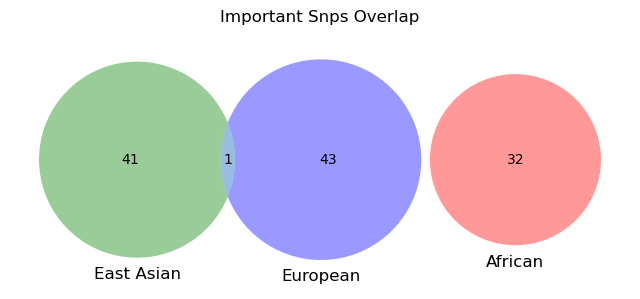

In [311]:
# Create a Venn diagram for the sets
plt.figure(figsize=(8, 8))
#venn3([set_coverage,set_coverage_fail, set_CNV_calling, set_CNV_calling_fail, set_passed_well, set_passed_well_fail], ('Coverage','Coverage Fail', 'CNV Calling','CNV Calling Fail', 'Passed Well', 'Passed Well Fail'))
#venn3([set_coverage, set_coverage_fail], ('Coverage','Coverage Fail'))
venn3([set(african_less_imp_alleles.index),set(eastern_less_imp_alleles.index),set(european_less_imp_alleles.index)], ('African','East Asian', 'European'))
# Set title and show the plot
plt.title('Important Snps Overlap')
plt.show()

# `Idea:`
## Find the occurence rates of the important snps

# `Idea:`
## Certain snps are likely to be coinherited. I can combine snps into regions based on which ones are closely related in the principal component and/or random forest model, i.e., FEATURE ENGINEER and create a new model:

 1. Distance Measures
Linear Distance: This is the simplest method, calculating the absolute distance between two gene loci based on their genomic coordinates. For example: [ \text{Distance} = | \text{Position}{\text{Gene A}} - \text{Position}{\text{Gene B}} | ]
Proximity Thresholds: You can set thresholds (e.g., within 10,000 base pairs) to define genes as "proximal."
2. Clustering Algorithms
Hierarchical Clustering: This method can group genes based on their distances to one another. Genes that are closer together will form clusters, revealing patterns of proximity.
K-Means Clustering: Genes can be clustered into a specified number of groups based on distances, potentially identifying co-located or functionally related genes.
3. Graphs and Network Analysis
Graphical Models: Gene positions can be represented as a graph where nodes represent genes and edges represent proximity relationships. Algorithms can then be applied to analyze connectivity and proximity.
Gene Co-expression Networks: Genes can be connected based on expression correlation, and proximity can be assessed in the context of the network structure.
4. Sliding Window Analysis
By sliding a window across the genome with a specified size, you can analyze gene density, identify groups of neighboring genes, and examine their functional relationships.
5. Genomic Annotation Tools
Bedtools: A popular command-line toolkit to manipulate genomic intervals and calculate overlaps, distances, and proximity. It can be used to identify proximal genes based on their annotated genomic coordinates.
GFF/GTF Files: Tools that parse Gene Feature Format files can be used to calculate distances internally.
6. Computational Frameworks
R/Bioconductor: R packages like GenomicRanges or Biostrings are used extensively in genomics and can handle genomic intervals and distances.
Python Libraries: Libraries such as Pandas, Biopython, and PyBEDTools can facilitate calculations of distance and proximity between genes based on their genomic positions.
7. Statistical Methods
Conditional Random Fields (CRF): In the context of genomic data, CRFs can be trained to predict gene relationships based on their positions and sequence information.

# `Idea:`
## I can fine-tune the n_parameters of the model. I can train random forest classifiers on each chromosome and combine these models and test if this allows me to get better resolution on the population classification. First, I can test if combining snps across 2 chromosomes leads to better PCA clustering. Then, stack classification models. What's the trade off here between more samples vs. more meta-data. I'm sort of treating each chromosome as a separate training set. Does this maximize the sample set?

# --> _**This is my next move!**_
## For this, I will reduce the model size by training it on the important features. I can also limit my data pulls to only these features to make it more computationally and data efficient.

## I can train on the European, East Asian and African sample data and then use this model to give probability of ancestory for all samples, including American samples which seem to have overlapping ancestry with the other 3 groups:

## Probabilities that the sample belongs to each category can be extracted:

In [318]:
y_pred_proba = model_2.predict_proba(X_val)
y_val_pred_2 = model_2.predict(X_val)

In [317]:
y_pred_proba[0][0,1], y_pred_proba[1][0,1], y_pred_proba[2][0,1]

(0.8753367256946115, 0.046559851316292186, 0.04580349862069304)

## Curious: How are the American samples categorized

In [333]:
y_val_model2 = y_val
y_val_model2['y_pred_African'] = y_val_pred_2[:,0] # African, East Asian, European
y_val_model2['y_pred_East_Asian'] = y_val_pred_2[:,1]
y_val_model2['y_pred_European'] = y_val_pred_2[:,2]
y_val_model2['African_prob'] = y_pred_proba[0][:,1] # African, East Asian, European
y_val_model2['East_Asian_prob'] = y_pred_proba[1][:,1]
y_val_model2['European_prob'] = y_pred_proba[2][:,1]

In [344]:
amer_subset = y_val_model2[y_val_model2['American Ancestry']==True]
print(f'Total count of samples in American subset: {amer_subset.shape[0]}')
n_African = amer_subset[amer_subset['y_pred_African']==True].shape[0]
print(f'Count predicted as African: {n_African}')
n_Asian = amer_subset[amer_subset['y_pred_East_Asian']==True].shape[0]
print(f'Count predicted as East Asian: {n_Asian}')
n_European = amer_subset[amer_subset['y_pred_European']==True].shape[0]
print(f'Count predicted as European: {n_European}')

Total count of samples in American subset: 27
Count predicted as African: 4
Count predicted as East Asian: 2
Count predicted as European: 21


# Model Size Reduction

# Saving the chromosome 22 model for use in other notebooks and for combining with other models

Exporting a trained machine learning model for use in other Python notebooks or as an executable can be done using various libraries. Below are some common methods to achieve this, along with brief explanations of how to implement each approach.

1. Using Joblib
Joblib is a popular library for saving and loading Python objects, especially for large NumPy arrays that are common in machine learning models.

Exporting:
python
Copy
from sklearn.externals import joblib  # For older versions of scikit-learn
## from joblib import dump, load  # For newer versions of joblib

# Assuming `model` is your trained machine learning model
joblib.dump(model, 'model_filename.pkl')
Importing:
python
Copy
## Load the model in another notebook or script
model = joblib.load('model_filename.pkl')
2. Using Pickle
Pickle is another Python library for serializing and deserializing Python objects.

Exporting:
python
Copy
import pickle

## Save the trained model to a file
with open('model_filename.pkl', 'wb') as file:
    pickle.dump(model, file)
Importing:
python
Copy
## Load the model in another notebook or script
with open('model_filename.pkl', 'rb') as file:
    model = pickle.load(file)
3. Using ONNX for Cross-Platform Compatibility
ONNX (Open Neural Network Exchange) allows you to export models between various frameworks (like TensorFlow, PyTorch, and Scikit-learn).

Exporting:
python
Copy
import onnx
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from skl2onnx import convert_sklearn

## Assuming `model` is your trained model
onnx_model = convert_sklearn(model, initial_types=[('input', FloatTensorType([None, n_features]))])
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
Importing:
You can load the ONNX model using libraries like ONNX Runtime or other compatible frameworks.

python
Copy
import onnxruntime as rt

sess = rt.InferenceSession("model.onnx")
4. Using TensorFlow Saved Model (if applicable)
If your model is built with TensorFlow or Keras, you can save it in the TensorFlow SavedModel format.

Exporting:
python
Copy
model.save('path_to_my_model_directory')  # Saves the model in SavedModel format
Importing:
python
Copy
from tensorflow import keras

## Load the model
model = keras.models.load_model('path_to_my_model_directory')
5. Creating a Python Executable with PyInstaller
If you want to run your model in an executable format, you can use PyInstaller to create standalone executables from Python scripts.

Steps:
Write a script to load your model and make predictions.
Install PyInstaller via pip:
bash
Copy
pip install pyinstaller
Use PyInstaller to create an executable:
bash
Copy
pyinstaller --onefile your_script.py
Summary
Joblib and Pickle are most commonly used for simple model serialization in Python.
ONNX is useful for sharing models across different programming frameworks.
TensorFlow Saved Model is the way to go for models built in TensorFlow.
PyInstaller enables you to make a Python script into an executable application.
The right choice depends on your specific use case, including deployment, framework compatibility, and the need for efficiency in saving and loading models.

In [ ]:
# 1. Using Joblib

from sklearn.externals import joblib  # For older versions of scikit-learn
# from joblib import dump, load  # For newer versions of joblib

# Assuming `model` is your trained machine learning model
joblib.dump(model, 'model_filename.pkl')

# Load the model in another notebook or script
model = joblib.load('model_filename.pkl')

#2. Using Pickle
Pickle is another Python library for serializing and deserializing Python objects.

import pickle

# Save the trained model to a file
with open('model_filename.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model in another notebook or script
with open('model_filename.pkl', 'rb') as file:
    model = pickle.load(file)
# 3. Using ONNX for Cross-Platform Compatibility
import onnx
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from skl2onnx import convert_sklearn

# Assuming `model` is your trained model
onnx_model = convert_sklearn(model, initial_types=[('input', FloatTensorType([None, n_features]))])
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

import onnxruntime as rt

sess = rt.InferenceSession("model.onnx")

#4. Using TensorFlow Saved Model (if applicable)
model.save('path_to_my_model_directory')  # Saves the model in SavedModel format

from tensorflow import keras

# Load the model
model = keras.models.load_model('path_to_my_model_directory')

# 5. Creating a Python Executable with PyInstaller
pip install pyinstaller

#Use PyInstaller to create an executable:
pyinstaller --onefile your_script.py